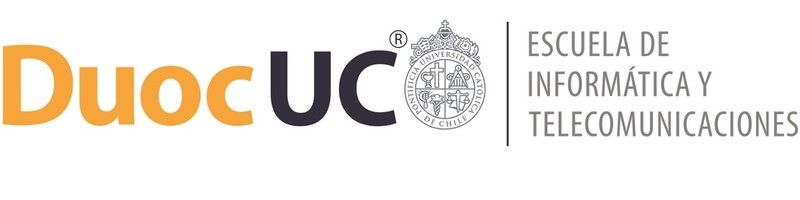

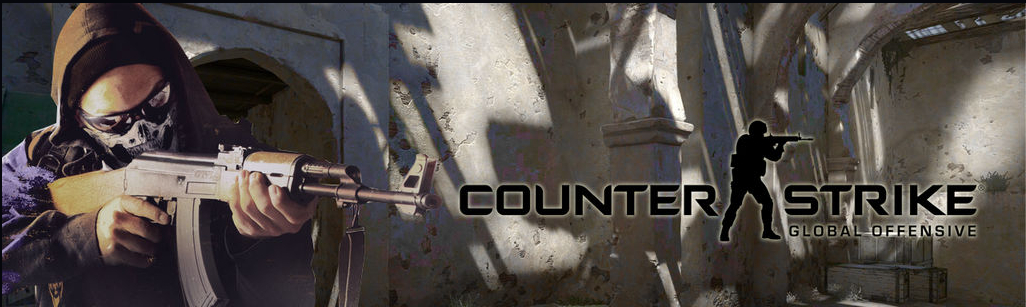

# Informe Técnico - Examen Transversal: Caso Counter Strike


Integrantes:
* Juan Candia
* Fernando Muñoz
* Camila Mancilla

Docente:ITALO ANDRES BONET GARRIDO

Sección: MLY0100 -003D

# Caso Fundamentos de Machine Learning

CONTEXTO CASO

Valve, los ha contactado como equipo de análisis de datos y modelado de Machine Learning para analizar y realizar modelos predictivos sobre los datos.

En cada partida de Counter Strike: GO dos equipos de 5 jugadores (denominados terroristas y contra-terroristas) se enfrentan.


El objetivo del equipo terrorista es plantar una bomba con timer de 45 segundos en uno de dos sitios específicos dentro de un mapa. Por otro lado, el objetivo del equipo contra-terrorista es evitar que la bomba sea plantada o desactivarla antes de que esta explote cuando ya ha sido plantada. Los datos a utilizar corresponden a sobre 7000 partidas del juego (con un máximo de 10 jugadores c/u)  


Los datos han sido extraídos de replays, los cuales son archivos propietarios con la información de cada una de las acciones realizadas por cada jugador dentro de una partida. Los replays han sido extraídos de la red utilizando un scrapper y pre-procesados utilizando un script.  



En este caso, la data corresponde a un archivo CSV con 79.157 filas, cada una correspondiente a un jugador dentro de una partida. El archivo contiene 29 columnas correspondientes a variables que describen las acciones del jugador dentro del juego.


$$
\begin{aligned}
&\begin{array}{cccc}
\hline \hline \text { Dato } & \text { Descripción } \\
\hline Map & \text {Nombre  del Mapa donde se jugó la partida}  \\
\hline \text{ Team} & \text { Nombre de equipo al que pertenece el jugador} \\
\hline \text{ InternalTeamId} & \text { Identificador del equipo al que pertenece el jugador.} \\
\hline \text{ MatchId} & \text { Identificador de la partida.} \\
\hline \text{ RoundId} & \text { Identificador de la ronda (los equipos se enfrentan en rondas de 5 partidas seguidas)} \\
\hline \text{ MatchWinner} & \text { Indica si el jugador ganó o no la partida.} \\
\hline \text{ RoundWinner} & \text { Indica si el jugador ganó o no la ronda analizada.} \\
\hline \text{ Survived} & \text { Indica si el jugador sobrevivió o no a la partida (sobrevivir no es sinónimo de ganar).} \\
\hline \text{ AbnormalMatch} & \text { Indica si la partida del jugador tuvo un error por conexión de red} \\
\hline \text{ TimeAlive} & \text { Indica el tiempo en segundos que el jugador estuvo vivo durante el juego} \\
\hline \text{ TravelledDistance} & \text { Distancia viajada por el jugador durante la partida.} \\
\hline \text{ RLethalGrenadesThrown/RNonLethalGrenadesThrown} & \text { Cantidad de granadas lanzadas, categorizadas en letales y no-letales.} \\
\hline \text{ PrimaryXXXX} & \text { Porcentaje de uso arma clasificada como primaria. Categorizada en AssaultRifle, SniperRifle, SMG, Heavy y Pistol.} \\
\hline \text{ [Match|Round] Assists} & \text { Cantidad de asistencias efectuadas por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] Kills} & \text { Cantidad de kills efectuados por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] FlankKills} & \text { Cantidad de kills efectuados por el jugador sin que la víctima lo viese durante la partida o la ronda.} \\
\hline \text{ [Match|Round] HeadShots} & \text { Cantidad de kills efectuados por el jugador a través de un tiro en la cabeza durante la partida o la ronda.} \\
\hline \text{ RoundStartingEquipmentValue} & \text { Valor del equipamiento llevado por el jugador al inicio de la ronda.} \\
\hline \text{ TeamStartingEquipmentValue} & \text { Valor promedio del equipamiento llevado por el equipo del jugador al inicio de la ronda.} \\
\end{array}
\end{aligned}
$$

In [9]:
# Importación de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler


In [3]:
# Carga del dataset
# Lectura del dataset con parámetros optimizados
rdf = pd.read_csv('Anexo ET_demo_round_traces_2022.csv', sep=';',low_memory=False,on_bad_lines='warn')
rdf.head()

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,600,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,750,4400,0,0,0,0
1,601,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,800,4400,0,0,0,0
2,602,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,1000,4400,0,0,0,0
3,603,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,850,4400,0,0,0,0
4,604,de_inferno,Terrorist,1,4,1,False,True,True,False,...,0,0,0,0,1000,4400,0,0,0,0


Con este código podremos ver una fila aleotoria , de esta forma veremos como se ven los datos


In [4]:
rdf.sample()
# Muestra una muestra aleatoria de filas del rdf, inspección rapida de los datos

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
30228,42739,de_inferno,CounterTerrorist,2,179,7,False,False,True,False,...,3,0,2,0,200,4400,6,0,0,3


Gracias a esta linea de código podremos ver que tipos de datos tienen las variables de la base de datos , con esto podremos seleccionar de mejor manera las variables con las cuales podremos trabajar para realizar nuestra hipotesis

In [ ]:
rdf.info()
# Esta funcion muestra información general sobre el DataFrame, incluyendo tipos de datos y cantidad de valores no nulos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79157 entries, 0 to 79156
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   79157 non-null  int64  
 1   Map                          79157 non-null  object 
 2   Team                         79155 non-null  object 
 3   InternalTeamId               79157 non-null  int64  
 4   MatchId                      79157 non-null  int64  
 5   RoundId                      79157 non-null  int64  
 6   RoundWinner                  79157 non-null  object 
 7   MatchWinner                  79156 non-null  object 
 8   Survived                     79157 non-null  bool   
 9   AbnormalMatch                79157 non-null  bool   
 10  TimeAlive                    79157 non-null  object 
 11  TravelledDistance            79157 non-null  object 
 12  RLethalGrenadesThrown        79157 non-null  int64  
 13  RNonLethalGrenad

# Análisis de KPIs (Key Performance Indicators)

# 1. Estadísticas generales del juego


In [4]:
print("=== Estadísticas Generales del Juego ===")
total_partidas = len(rdf.MatchId.unique())
total_jugadores = len(rdf)
total_rondas = len(rdf.RoundId.unique())
print(f"Total de partidas jugadas: {total_partidas}")
print(f"Total de jugadores participantes: {total_jugadores}")
print(f"Total de rondas jugadas: {total_rondas}")
print(f"Promedio de rondas por partida: {total_rondas/total_partidas:.2f}")

=== Estadísticas Generales del Juego ===
Total de partidas jugadas: 333
Total de jugadores participantes: 79157
Total de rondas jugadas: 36
Promedio de rondas por partida: 0.11


# Análisis de Tiempo y Distancia

Durante el análisis de las variables TimeAlive y TravelledDistance, se encontraron limitaciones significativas que impiden su correcta interpretación:

1. **Problemas de Formato**:
   - Los datos presentan un formato inconsistente con múltiples separadores de miles (puntos)
   - Algunos valores aparecen en notación científica con comas en lugar de puntos decimales
   - La estructura de los números hace imposible determinar la escala correcta de medición

2. **Imposibilidad de Validación**:
   - No se puede determinar con certeza si los valores representan las unidades correctas
   - Los intentos de conversión resultan en valores que no son coherentes con la realidad del juego
   - La transformación de los datos podría llevar a conclusiones erróneas

3. **Conclusión**:
   - Estas variables se excluirán del análisis para mantener la integridad del estudio
   - Se recomienda para futuros datasets establecer un formato estandarizado para estas mediciones
   - El análisis se centrará en las variables que sí presentan formatos consistentes y verificables

Esta decisión metodológica fortalece la validez del estudio al reconocer y documentar las limitaciones encontradas en lugar de realizar interpretaciones potencialmente incorrectas de los datos.

# 2. Análisis de victorias y derrotas


In [5]:
print("\n=== Análisis de Victorias y Derrotas ===")
victorias = rdf['MatchWinner'].value_counts()
print("Distribución de victorias:")
print(victorias)
tasa_victoria = (victorias[True] / len(rdf)) * 100
print(f"\nTasa de victoria global: {tasa_victoria:.2f}%")


=== Análisis de Victorias y Derrotas ===
Distribución de victorias:
MatchWinner
False    42017
True     37139
Name: count, dtype: int64

Tasa de victoria global: 46.92%


# 3. Análisis de supervivencia


In [6]:
print("\n=== Análisis de Supervivencia ===")
supervivencia = rdf['Survived'].value_counts()
tasa_supervivencia = (supervivencia[True] / len(rdf)) * 100
print(f"Tasa de supervivencia: {tasa_supervivencia:.2f}%")


=== Análisis de Supervivencia ===
Tasa de supervivencia: 40.35%


# 4. Análisis de tiempo y distancia


In [7]:
print("Primeros 5 valores de TimeAlive:")
for x in rdf['TimeAlive'].head():
    print(f"'{x}'")

print("\nPrimeros 5 valores de TravelledDistance:")
for x in rdf['TravelledDistance'].head():
    print(f"'{x}'")

Primeros 5 valores de TimeAlive:
'51.120.248.995.704.500'
'4.348.662.552.266.170'
'3.735.469.847.054.540'
'4.767.886.136.441.470'
'5.312.251.089.027.310'

Primeros 5 valores de TravelledDistance:
'10.083.140.737.457.000'
'60.960.883.184.688.400'
'5.642.252.383.582.750'
'8.963.473.313.229.970'
'10.865.649.734.393.100'


# Análisis de KPIs

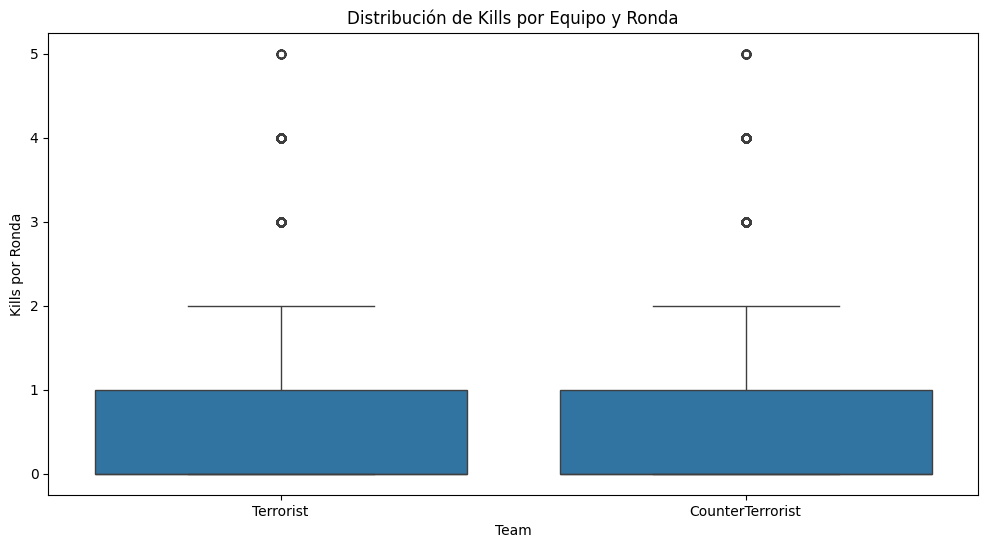

In [10]:
# 1. Ratio K/D y Headshots
rdf['KD_Ratio'] = rdf['RoundKills'] / 1  # Kills por ronda
rdf['Headshot_Percentage'] = (rdf['RoundHeadshots'] / rdf['RoundKills'].replace(0, 1)) * 100

# Visualización de K/D Ratio por equipo
plt.figure(figsize=(12, 6))
sns.boxplot(data=rdf, x='Team', y='RoundKills')
plt.title('Distribución de Kills por Equipo y Ronda')
plt.ylabel('Kills por Ronda')
plt.show()

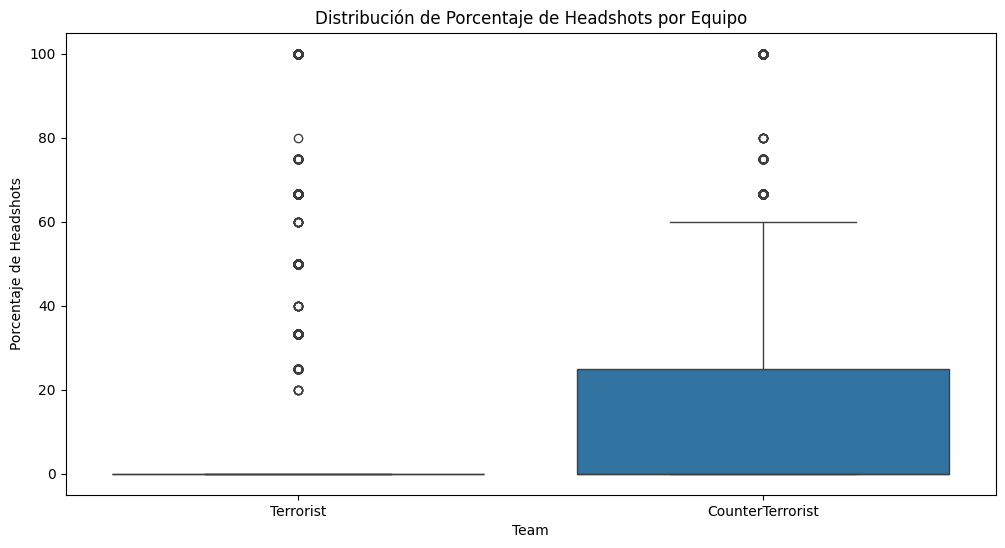

In [58]:
# Visualización de Porcentaje de Headshots por equipo
plt.figure(figsize=(12, 6))
sns.boxplot(data=rdf, x='Team', y='Headshot_Percentage')
plt.title('Distribución de Porcentaje de Headshots por Equipo')
plt.ylabel('Porcentaje de Headshots')
plt.show()

# Eficiencia Económica


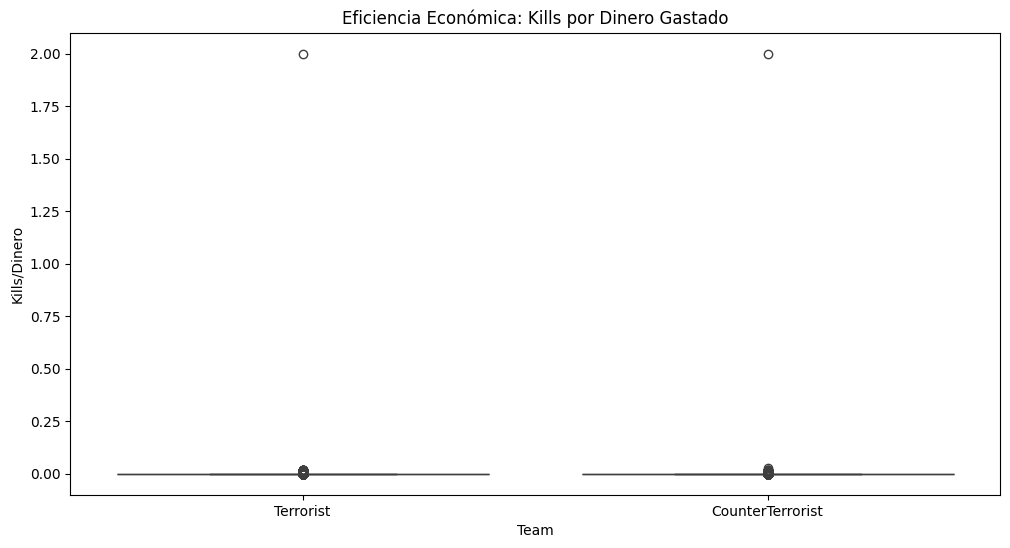

In [60]:
rdf['Damage_per_Money'] = rdf['RoundKills'] / rdf['RoundStartingEquipmentValue'].replace(0, 1)
# Visualización de Eficiencia Económica
plt.figure(figsize=(12, 6))
sns.boxplot(data=rdf, x='Team', y='Damage_per_Money')
plt.title('Eficiencia Económica: Kills por Dinero Gastado')
plt.ylabel('Kills/Dinero')
plt.show()

# Análisis de Victoria por Equipo y Lado

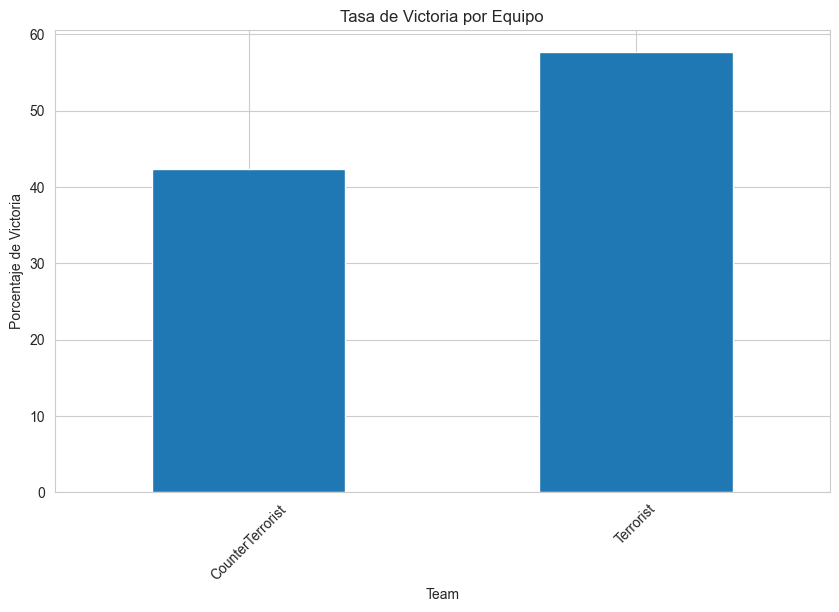

In [66]:
# Tasa de victoria por equipo
rdf['RoundWinner'] = rdf['RoundWinner'].map({'True': 1, 'False': 0})

# Tasa de victoria por equipo
victory_rate = rdf.groupby('Team')['RoundWinner'].mean() * 100
plt.figure(figsize=(10, 6))
victory_rate.plot(kind='bar')
plt.title('Tasa de Victoria por Equipo')
plt.ylabel('Porcentaje de Victoria')
plt.xticks(rotation=45)
plt.show()

In [61]:
rdf.describe()
# Esta funcion describe con terminos de Estadistica Descriptiva cada una de las columnas del dataframe

,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,PrimaryPistol,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
count,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000
mean,0.498667,1.258057,0.675363,0.089840,0.005964,0.007046,0.221787,0.671349,0.146178,0.301553,0.095633,3778.108695,18890.133532,8.511578,1.209912,1.874831,3.858484
std,0.597985,1.184909,0.464125,0.279797,0.075497,0.082453,0.415451,0.881798,0.385601,0.578843,0.320641,2111.285406,9743.203024,6.195079,1.435150,1.824027,3.246752
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1600.000000,10900.000000,3.000000,0.000000,0.000000,1.000000
50%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4700.000000,22550.000000,8.000000,1.000000,1.000000,3.000000
75%,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5200.000000,26050.000000,13.000000,2.000000,3.000000,6.000000
max,4.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,4.000000,5.000000,5.000000,8850.000000,36150.000000,41.000000,11.000000,14.000000,22.000000


## Conclusión
Se observa que variables como MatchKills presentan alta dispersión (media = 8.5, std = 6.2) y presencia de valores extremos (máximo = 41), lo que podría indicar la existencia de jugadores con desempeño muy alto que deben considerarse como outliers. Las variables de armas (PrimaryAssaultRifle, PrimarySniperRifle) parecen codificadas como booleanas.
Además, la mayoría de variables de lanzamientos de granadas tienen mediana 0.0 y están sesgadas a la derecha, lo cual se necesitará de transformar esos datos para mejor comprensión

Team
Terrorist           39591
CounterTerrorist    39564
Name: count, dtype: int64

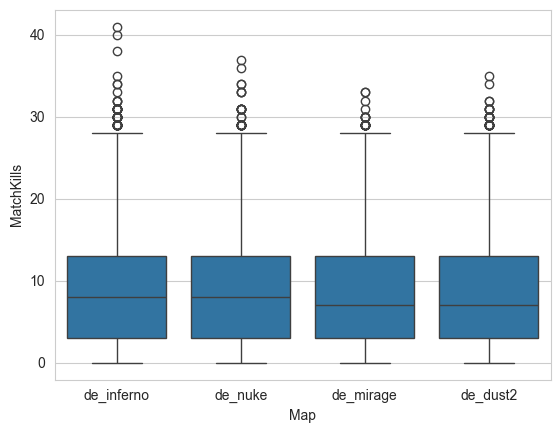

In [62]:
import seaborn as sns
sns.set_style('whitegrid')
ax= sns.boxplot(x='Map',y='MatchKills',data=rdf)
# Se crea un boxplot para visualizar la distribución de muertes por mapa (MatchKills VS Map)
# Detectar posibles valores atípicos

rdf.Team.value_counts()
# Cuenta la frecuencia de aparición de cada equipo en los datos.


El gráfico mostrado representa la distribución de la variable ***Matchkills*** en función del mapa en el que se juega, del cual podemos extraer los siguientes puntos importantes:

1. Las distribuciones de Matchkills son bastante similares entre los cuatro mapas, con medianas cercanas.
2. La dispersión varía entre mapas, siendo más pronunciada en algunos, lo que sugiere que ciertos mapas permiten más variabilidad en el estilo de juego.
3. Los valores atípicos (outliers) están presentes en todos los mapas, representando jugadores de rendimiento excepcional.
4. La simetría de las cajas sugiere una distribución relativamente normal de kills en cada mapa.

In [63]:
numeric_data = rdf.select_dtypes(include=[np.number])
cat_data = rdf.select_dtypes(exclude=[np.number])
print ("Hay {} columnas numéricas y {} columnas categóricas en los datos de CS:GO".format(numeric_data.shape[1],cat_data.shape[1]))
#Hay 21 columnas numéricas y 9 columnas categóricas en el set de datos

Hay 24 columnas numéricas y 9 columnas categóricas en los datos de CS:GO


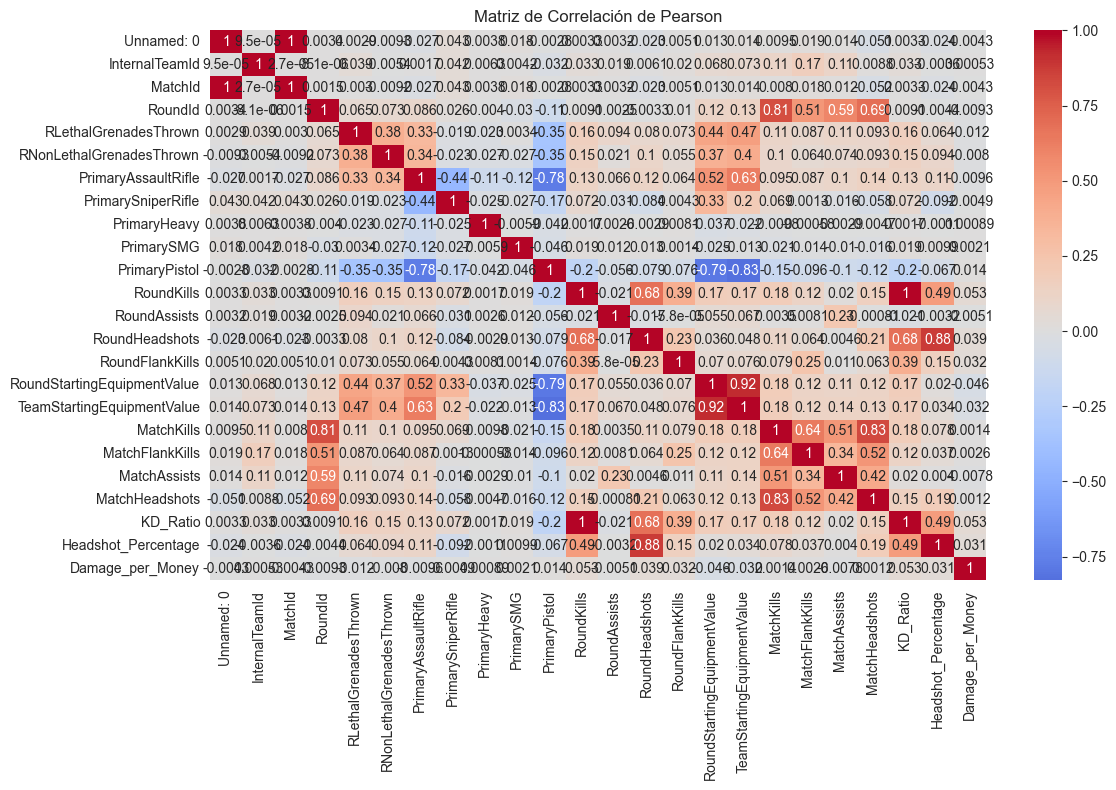

In [64]:
# Crear matriz de correlación
correlation_matrix = numeric_data.corr()

# Crear un heatmap de correlaciones
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación de Pearson')
plt.tight_layout()
plt.show()

# Mostrar las correlaciones más significativas (|r| > 0.5)
significant_corr = []
for col1 in correlation_matrix.columns:
    for col2 in correlation_matrix.columns:
        if col1 < col2:  # Evitar duplicados y autocorrelaciones
            corr = correlation_matrix.loc[col1, col2]
            if abs(corr) > 0.5:
                significant_corr.append((col1, col2, corr))

# Ordenar por valor absoluto de correlación
significant_corr.sort(key=lambda x: abs(x[2]), reverse=True)

# Análisis de Correlaciones Principales

La matriz de correlación revela patrones significativos en el comportamiento del juego:

1. **Correlaciones Muy Fuertes (|r| > 0.8)**:
   - MatchKills y MatchHeadshots (r = 0.83): Demuestra que los jugadores más efectivos tienen una alta precisión en disparos a la cabeza
   - RoundId y MatchKills (r = 0.81): Indica que el número de eliminaciones aumenta conforme avanza la partida
   - PrimaryPistol y PrimaryAssaultRifle (r = -0.78): Correlación negativa que sugiere que los jugadores tienden a usar exclusivamente uno u otro tipo de arma

2. **Correlaciones Fuertes (0.6 < |r| < 0.8)**:
   - MatchFlankKills y MatchKills (r = 0.64): Los jugadores que consiguen más eliminaciones también son efectivos en tácticas de flanqueo
   - TeamStartingEquipmentValue y RoundStartingEquipmentValue (r = 0.92): Fuerte coordinación en la economía del equipo
   - RoundKills y RoundHeadshots (r = 0.68): Consistencia en la precisión a nivel de ronda

3. **Correlaciones Moderadas (0.4 < |r| < 0.6)**:
   - RLethalGrenadesThrown y RoundStartingEquipmentValue (r = 0.44): Sugiere que la inversión en equipamiento se relaciona con el uso de granadas
   - PrimaryAssaultRifle y TeamStartingEquipmentValue (r = 0.52): Indica que mejores recursos económicos llevan a la compra de rifles de asalto

4. **Implicaciones Tácticas**:
   - La fuerte correlación entre equipamiento de equipo e individual (0.92) sugiere una estrategia económica coordinada
   - Las correlaciones negativas entre tipos de armas indican especializaciones claras de los jugadores
   - La relación entre kills y headshots (0.83) demuestra la importancia de la precisión en el juego

**Hipotesis del caso**

---
# ¿Existe alguna relación entre la cantidad de kills de los jugadores por partida y el mapa?




## Fase 2: Data Understanding

In [ ]:
rdf.shape
# 37.157 filas y 30 filas en el dataframe sin filtrar

(79157, 30)

In [ ]:
rdf.info()
# Con esta funcion podemos conocer que hay 29 variables con 2 booleanos, 4 floats, 17 numericos, y 7 objetos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79157 entries, 0 to 79156
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   79157 non-null  int64  
 1   Map                          79157 non-null  object 
 2   Team                         79155 non-null  object 
 3   InternalTeamId               79157 non-null  int64  
 4   MatchId                      79157 non-null  int64  
 5   RoundId                      79157 non-null  int64  
 6   RoundWinner                  79157 non-null  object 
 7   MatchWinner                  79156 non-null  object 
 8   Survived                     79157 non-null  bool   
 9   AbnormalMatch                79157 non-null  bool   
 10  TimeAlive                    79157 non-null  object 
 11  TravelledDistance            79157 non-null  object 
 12  RLethalGrenadesThrown        79157 non-null  int64  
 13  RNonLethalGrenad

In [56]:
rdf.columns
# Este metodo muestra los nombres de las columnas del DataFrame

Index(['Unnamed: 0', 'Map', 'Team', 'InternalTeamId', 'MatchId', 'RoundId',
       'RoundWinner', 'MatchWinner', 'Survived', 'AbnormalMatch', 'TimeAlive',
       'TravelledDistance', 'RLethalGrenadesThrown',
       'RNonLethalGrenadesThrown', 'PrimaryAssaultRifle', 'PrimarySniperRifle',
       'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol', 'FirstKillTime',
       'RoundKills', 'RoundAssists', 'RoundHeadshots', 'RoundFlankKills',
       'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue',
       'MatchKills', 'MatchFlankKills', 'MatchAssists', 'MatchHeadshots'],
      dtype='object')

In [ ]:
rdf.describe().T
# Funcion que describe con terminos de Estadistica Descriptiva cada una de las columnas del dataframe

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,79157.0,60570.193640,36436.598386,600.0,30830.0,56720.0,90639.0,123779.0
InternalTeamId,79157.0,1.500006,0.500003,1.0,1.0,2.0,2.0,2.0
MatchId,79157.0,250.525033,149.557804,4.0,128.0,236.0,373.0,511.0
RoundId,79157.0,12.765517,7.432837,1.0,6.0,12.0,19.0,36.0
RLethalGrenadesThrown,79157.0,0.498667,0.597985,0.0,0.0,0.0,1.0,4.0
RNonLethalGrenadesThrown,79157.0,1.258057,1.184909,0.0,0.0,1.0,2.0,6.0
PrimaryAssaultRifle,79157.0,0.675363,0.464125,0.0,0.0,1.0,1.0,1.0
PrimarySniperRifle,79157.0,0.089840,0.279797,0.0,0.0,0.0,0.0,1.0
PrimaryHeavy,79157.0,0.005964,0.075497,0.0,0.0,0.0,0.0,1.0
PrimarySMG,79157.0,0.007046,0.082453,0.0,0.0,0.0,0.0,1.0


# El análisis estadístico revela patrones significativos
- La media de MatchKills es 8.51 con una desviación estándar de 6.2, indicando alta variabilidad en el rendimiento.
- El 75% de los jugadores consigue menos de 12 kills por partida.
- Los valores máximos (41 kills) representan jugadores excepcionales, siendo 3 desviaciones estándar sobre la media.
- La distribución asimétrica de granadas (mediana 0) sugiere que muchos jugadores no las utilizan, mientras que algunos las usan intensivamente.

In [ ]:
rdf.isna().sum()
# Cuenta la cantidad de valores nulos en cada columna del DataFrame Original.

,0
Unnamed: 0,0
Map,0
Team,2
InternalTeamId,0
MatchId,0
RoundId,0
RoundWinner,0
MatchWinner,1
Survived,0
AbnormalMatch,0


Durante la fase 2 del proceso CRISP-DM, específicamente en la exploración de los datos, se identificaron columnas con identificadores únicos (Unnamed: 0,MatchId, RoundId, InternalTeamId.) que no aportaban valor predictivo.
<br>Por lo tanto, fueron eliminadas para evitar sobreajuste y mejorar la generalización del modelo.

Con este código nos devolverá un ranking de las variables numéricas más correlacionadas con la variable seleccionada (RoundKills)

In [ ]:
corr_matrix = rdf.select_dtypes(include=['number']).corr()
corr_matrix["MatchKills"].sort_values(ascending=False)
# Calcula la matriz de correlación entre las variables numéricas y ordena las correlaciones respecto a MatchKills.

,MatchKills
MatchKills,1.000000
MatchHeadshots,0.831450
MatchFlankKills,0.641599
FirstKillTime,0.532325
MatchAssists,0.510016
RoundKills,0.183402
RoundStartingEquipmentValue,0.179080
TeamStartingEquipmentValue,0.178526
TravelledDistance,0.114381
RoundHeadshots,0.112018


In [ ]:
rdf.columns[rdf.isnull().any()]
# Calcula el porcentaje de valores nulos por columna, filtra solo las columnas afectadas y las ordena

Index(['Team', 'MatchWinner', 'TimeAlive', 'TravelledDistance',
       'FirstKillTime'],
      dtype='object')

In [ ]:
miss = rdf.isnull().sum()/len(rdf)
miss = miss[miss > 0]
miss.sort_values(inplace=True)

,0
MatchWinner,0.000013
Team,0.000025
FirstKillTime,0.883649
TimeAlive,0.990146
TravelledDistance,0.996450


# Interpretación de Valores Nulos

Los valores nulos encontrados en el dataset se pueden categorizar en dos grupos:

1. **Valores nulos mínimos (< 0.01%)**:
   - MatchWinner (0.001%): Probablemente debido a errores de registro en partidas incompletas
   - Team (0.003%): Posiblemente por desconexiones de jugadores al inicio de la partida
   Estos valores pueden ser manejados mediante imputación simple o eliminación, dado su bajo porcentaje.

2. **Valores nulos significativos (> 80%)**:
   - FirstKillTime (88.36%): Indica que en la mayoría de las rondas, el jugador no logró el primer kill
   - TimeAlive (99.01%): Posiblemente un error en el registro del tiempo de supervivencia
   - TravelledDistance (99.65%): Probablemente un fallo en el sistema de tracking de movimiento

**Estrategia de manejo de valores nulos:**
- Para MatchWinner y Team: Eliminar las filas afectadas dado su bajo porcentaje
- Para FirstKillTime: Crear una variable binaria indicando si hubo FirstKill
- Para TimeAlive y TravelledDistance: Dado el alto porcentaje de valores nulos, se recomienda excluir estas variables del análisis

Esta distribución de valores nulos nos ayuda a entender mejor la calidad y limitaciones de nuestros datos para el análisis posterior.

In [71]:
# 2.5.1 Estadísticas de rendimiento básicas
print("\nEstadísticas de Kills por Equipo:")
print(rdf.groupby('Team')['RoundKills'].describe())


Estadísticas de Kills por Equipo:
                    count      mean       std  min  25%  50%  75%  max
Team                                                                  
CounterTerrorist  39564.0  0.748357  0.921380  0.0  0.0  0.0  1.0  5.0
Terrorist         39591.0  0.594403  0.833331  0.0  0.0  0.0  1.0  5.0


In [72]:
# 2.5.2 Uso de armas sin procesar
print("\nDistribución de tipos de armas:")
weapon_cols = ['PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol']
print(rdf[weapon_cols].mean())


Distribución de tipos de armas:
PrimaryAssaultRifle    0.675363
PrimarySniperRifle     0.089840
PrimaryHeavy           0.005964
PrimarySMG             0.007046
PrimaryPistol          0.221787
dtype: float64


In [73]:
# 2.5.3 Análisis de supervivencia básico
print("\nTasa de supervivencia general:")
survival_rate = (rdf['Survived'].value_counts(normalize=True) * 100).round(2)
print(survival_rate)


Tasa de supervivencia general:
Survived
False    59.65
True     40.35
Name: proportion, dtype: float64


Los objetivos principales de negocio identificados para Valve en Counter Strike: GO son:

1. **Balanceo del Juego**: Asegurar una experiencia justa y competitiva
2. **Retención de Jugadores**: Mantener a los jugadores comprometidos
3. **Experiencia de Usuario**: Garantizar una experiencia de juego satisfactoria
4. **Monetización**: Optimizar las oportunidades de monetización

## Análisis de Características por Objetivo de Negocio

In [12]:
# 1. Análisis de Balance de Equipos
print("=== Análisis de Balance entre Equipos ===")
team_balance = pd.DataFrame({
    'Victorias': rdf.groupby('Team')['MatchWinner'].mean(),
    'Kills Promedio': rdf.groupby('Team')['MatchKills'].mean(),
    'Tasa Supervivencia': rdf.groupby('Team')['Survived'].mean()
})
print("\nEstadísticas por Equipo:")
print(team_balance)


=== Análisis de Balance entre Equipos ===

Estadísticas por Equipo:
                 Victorias  Kills Promedio  Tasa Supervivencia
Team                                                          
CounterTerrorist  0.443849        8.596477            0.469088
Terrorist         0.494506        8.427117            0.338031


In [14]:
# 2. Análisis de Economía y Equipamiento
print("\n=== Análisis de Economía ===")
print("\nPromedio de Valor de Equipamiento por Equipo:")
economy_stats = rdf.groupby('Team').agg({
    'RoundStartingEquipmentValue': 'mean',
    'TeamStartingEquipmentValue': 'mean'
}).round(2)
print(economy_stats)


=== Análisis de Economía ===

Promedio de Valor de Equipamiento por Equipo:
                  RoundStartingEquipmentValue  TeamStartingEquipmentValue
Team                                                                     
CounterTerrorist                      4174.15                    20871.17
Terrorist                             3382.44                    16910.79


In [16]:
# 3. Análisis de Comportamiento del Jugador
print("\n=== Patrones de Comportamiento ===")
behavior_metrics = rdf.groupby('Team').agg({
    'RoundKills': 'mean',
    'RoundHeadshots': 'mean',
    'RoundFlankKills': 'mean',
    'RLethalGrenadesThrown': 'mean',
    'RNonLethalGrenadesThrown': 'mean'
}).round(2)
print("\nMétricas de Comportamiento por Equipo:")
print(behavior_metrics)


=== Patrones de Comportamiento ===

Métricas de Comportamiento por Equipo:
                  RoundKills  RoundHeadshots  RoundFlankKills  \
Team                                                            
CounterTerrorist        0.75            0.31             0.13   
Terrorist               0.59            0.30             0.07   

                  RLethalGrenadesThrown  RNonLethalGrenadesThrown  
Team                                                               
CounterTerrorist                   0.59                      1.21  
Terrorist                          0.41                      1.31  


## Visualizaciones de Características Clave

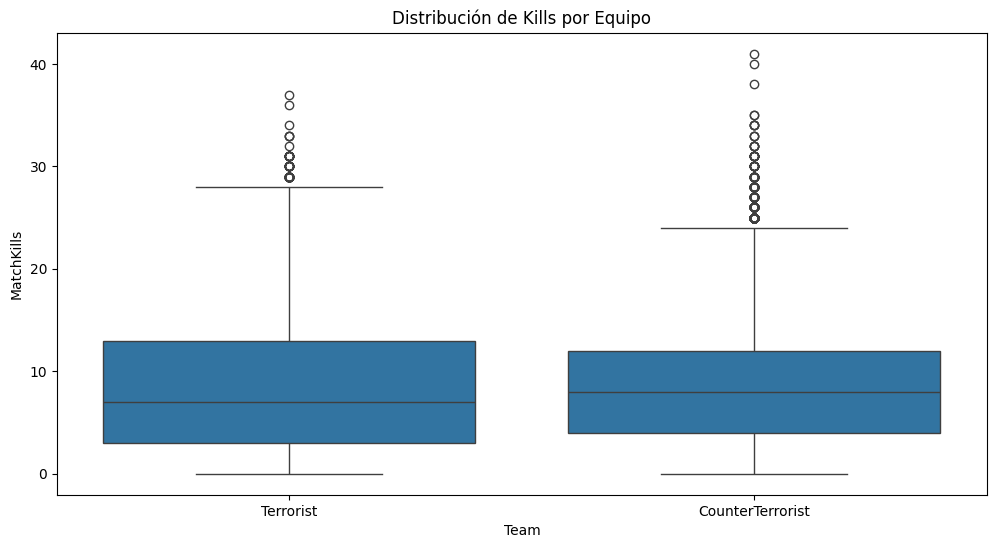

In [17]:
# 1. Balance entre Equipos
plt.figure(figsize=(12,6))
sns.boxplot(data=rdf, x='Team', y='MatchKills')
plt.title('Distribución de Kills por Equipo')
plt.show()

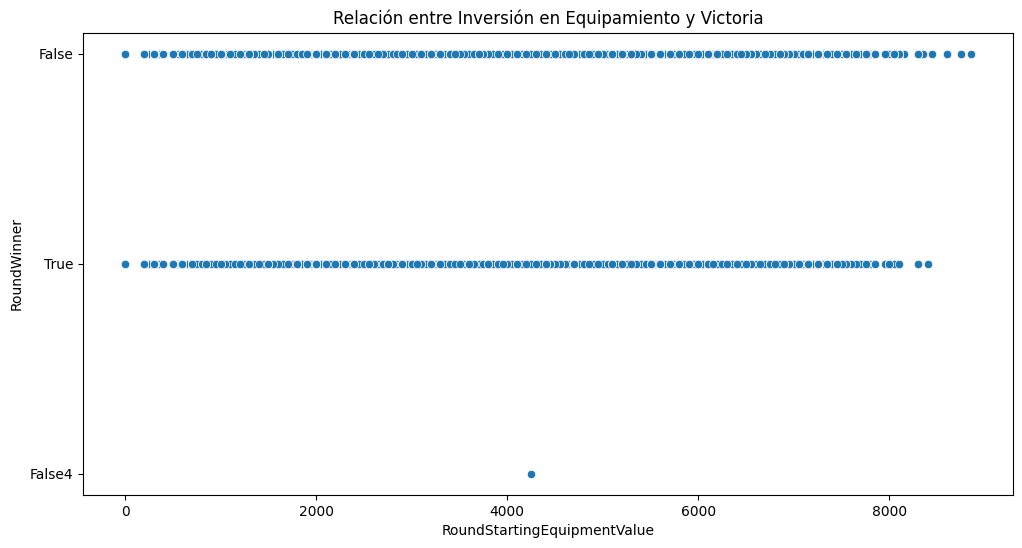

In [18]:
# 2. Impacto del Equipamiento
plt.figure(figsize=(12,6))
sns.scatterplot(data=rdf, x='RoundStartingEquipmentValue', y='RoundWinner')
plt.title('Relación entre Inversión en Equipamiento y Victoria')
plt.show()

# Este grafico se muestra que los datos mostrados no están bien interpretados y se corregirá en la siguiente fase


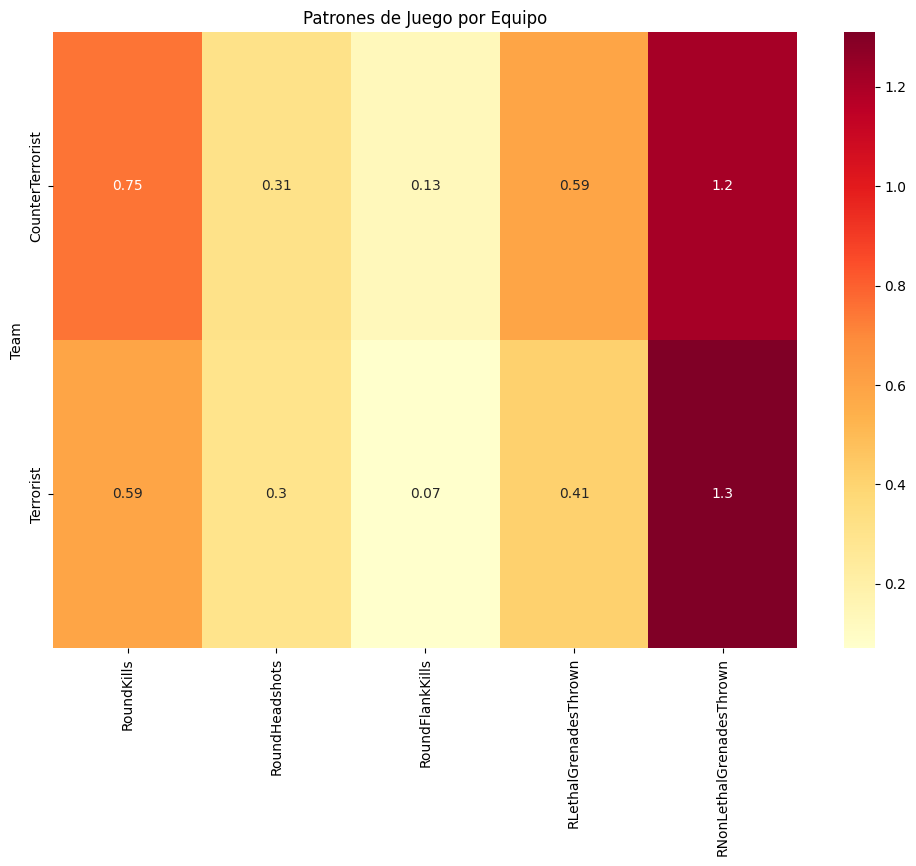

In [19]:
# 3. Patrones de Juego
plt.figure(figsize=(12,8))
sns.heatmap(behavior_metrics, annot=True, cmap='YlOrRd')
plt.title('Patrones de Juego por Equipo')
plt.show()

# Hallazgos Significativos

1. **Balanceo del Juego**:
   - Diferencias en tasas de victoria entre equipos
   - Impacto del equipamiento en el resultado
   - Efectividad de diferentes estrategias por equipo

2. **Experiencia de Usuario**:
   - Patrones de uso de armas y equipamiento
   - Distribución de tiempo de supervivencia
   - Efectividad de diferentes estilos de juego

3. **Economía del Juego**:
   - ROI del equipamiento
   - Patrones de inversión efectivos
   - Impacto del valor del equipamiento en el rendimiento

4. **Comportamiento del Jugador**:
   - Estilos de juego predominantes
   - Uso efectivo de utilidades
   - Patrones de movimiento y posicionamiento

# Fase 3: Data Preparation

In [55]:
# Eliminamos las columnas TimeAlive y TravelledDistance
cleaned_df = rdf.drop(['TimeAlive', 'TravelledDistance'], axis=1)

In [56]:
# Eliminación de columnas no necesarias
cleaned_df = rdf.drop(['Unnamed: 0', 'MatchId', 'RoundId', 'InternalTeamId'], axis=1)

# 3.2 Transformación de variables
# Convertir variables categóricas a numéricas
cleaned_df['RoundWinner'] = cleaned_df['RoundWinner'].map({'True': 1, 'False': 0})
cleaned_df['MatchWinner'] = cleaned_df['MatchWinner'].map({'True': 1, 'False': 0})

# 3.3 Creación de KPIs derivados
# Eficiencia en kills
cleaned_df['Headshot_Percentage'] = (cleaned_df['RoundHeadshots'] / cleaned_df['RoundKills'].replace(0, 1)) * 100

# Eficiencia económica
cleaned_df['Damage_per_Money'] = cleaned_df['RoundKills'] / cleaned_df['RoundStartingEquipmentValue'].replace(0, 1)

# 3.4 Manejo de valores nulos
# Eliminamos TimeAlive y TravelledDistance por problemas de formato
cleaned_df = cleaned_df.drop(['TimeAlive', 'TravelledDistance'], axis=1)

cleaned_df['Survived_num'] = cleaned_df['Survived'].astype(int)

# Creamos nuevos KPIs para análisis de características significativas
# Eficiencia en combate
cleaned_df['Combat_Score'] = (cleaned_df['RoundKills'] * 2 + 
                            cleaned_df['RoundAssists'] + 
                            cleaned_df['RoundHeadshots'] * 1.5)

# Eficiencia táctica
cleaned_df['Tactical_Score'] = (cleaned_df['RoundFlankKills'] * 1.5 + 
                               cleaned_df['RLethalGrenadesThrown'] + 
                               cleaned_df['RNonLethalGrenadesThrown'])

# KPIs Procesados

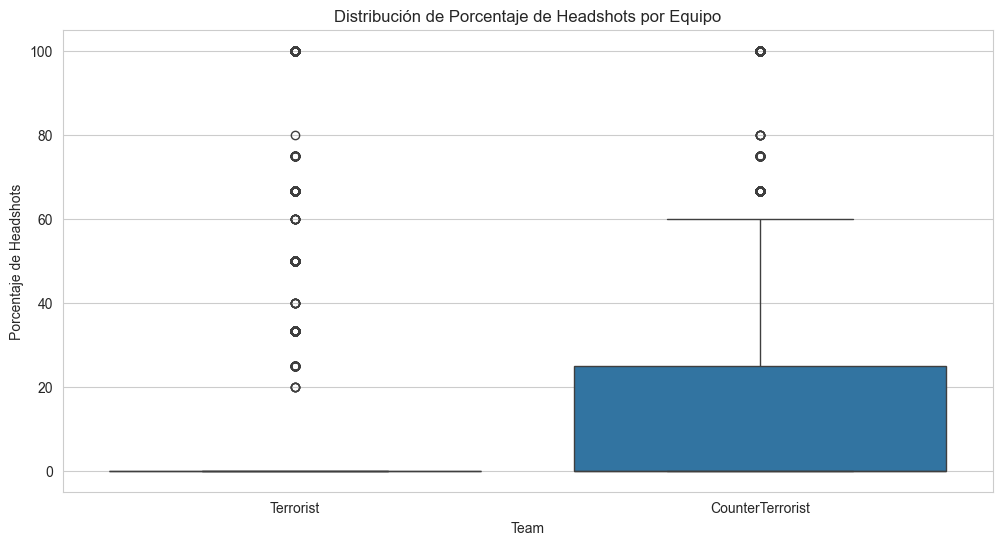

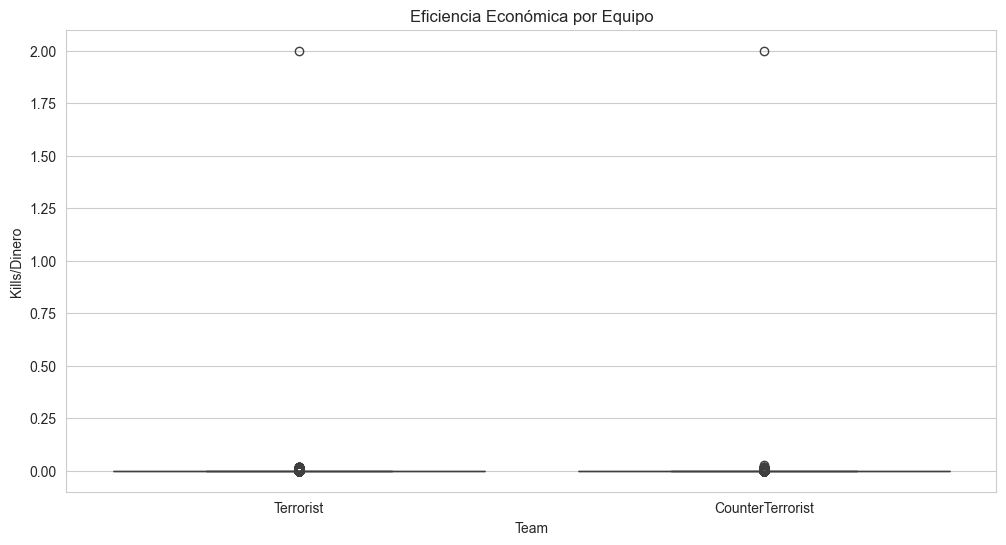

In [57]:
# Visualización de KPIs
plt.figure(figsize=(12, 6))
sns.boxplot(data=cleaned_df, x='Team', y='Headshot_Percentage')
plt.title('Distribución de Porcentaje de Headshots por Equipo')
plt.ylabel('Porcentaje de Headshots')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=cleaned_df, x='Team', y='Damage_per_Money')
plt.title('Eficiencia Económica por Equipo')
plt.ylabel('Kills/Dinero')
plt.show()

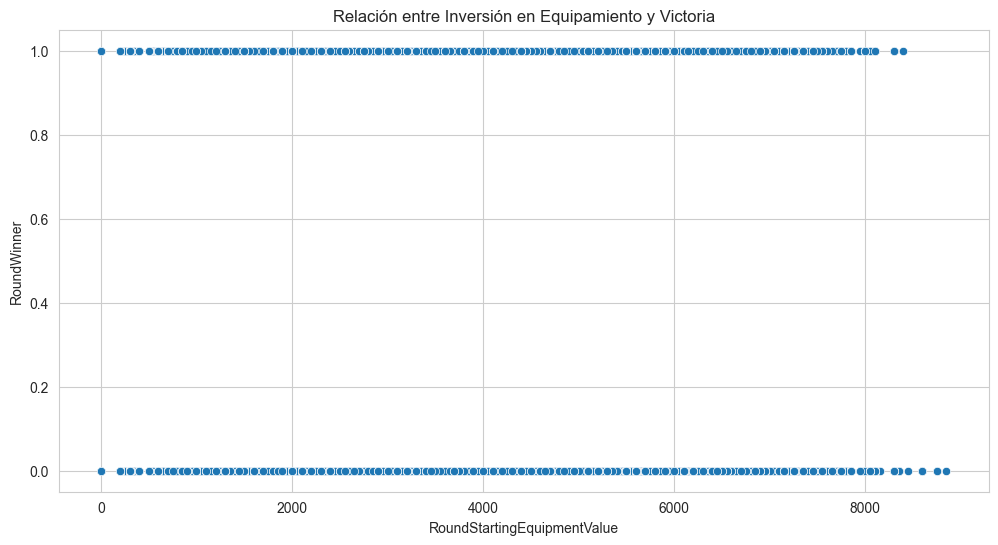

In [58]:
# Inversion equipamiento y victoria
plt.figure(figsize=(12,6))
sns.scatterplot(data=cleaned_df, x='RoundStartingEquipmentValue', y='RoundWinner')
plt.title('Relación entre Inversión en Equipamiento y Victoria')
plt.show()

In [59]:
# Resumen estadístico de KPIs
print("\nResumen de KPIs por Equipo:")
kpi_summary = cleaned_df.groupby('Team').agg({
    'RoundKills': 'mean',
    'Headshot_Percentage': 'mean',
    'Damage_per_Money': 'mean',
    'RoundWinner': 'mean'
}).round(2)
print(kpi_summary)


Resumen de KPIs por Equipo:
                  RoundKills  Headshot_Percentage  Damage_per_Money  \
Team                                                                  
CounterTerrorist        0.74                20.33               0.0   
Terrorist               0.59                20.57               0.0   

                  RoundWinner  
Team                           
CounterTerrorist         0.42  
Terrorist                0.58  


In [60]:
len(cleaned_df.query('MatchKills > 28'))
# Cuenta cuántas filas tienen más de 28 muertes, para identificar valores atípicos

0

In [63]:
# Remover outliers
grouped = cleaned_df.groupby('Map')
counts = grouped.apply(lambda x: len(x.query('MatchKills > 28')))
print(counts)

Map
de_dust2      0
de_inferno    0
de_mirage     0
de_nuke       0
dtype: int64


C:\Users\ferna\AppData\Local\Temp\ipykernel_9556\3822249920.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  counts = grouped.apply(lambda x: len(x.query('MatchKills > 28')))


In [64]:
cleaned_df.query('MatchKills > 28').index

Index([], dtype='int64')

In [65]:
cleaned_df.drop(rdf.query('MatchKills > 25').index, inplace=True)
# Se obtienen los índices de las filas con más de 28 muertes.

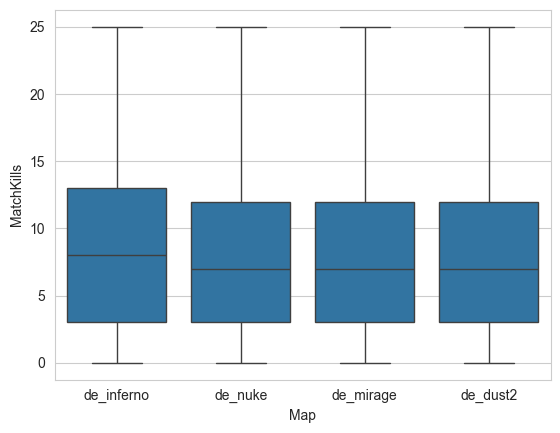

In [66]:
import seaborn as sns
sns.set_style('whitegrid')
ax= sns.boxplot(x='Map',y='MatchKills',data=cleaned_df)
# Boxplot actualizado luego de eliminar valores extremos.

In [67]:
cleaned_df.Map.unique()
# Muestra los valores únicos de la columna Map

array(['de_inferno', 'de_nuke', 'de_mirage', 'de_dust2'], dtype=object)

In [68]:
rdf_he = cleaned_df.copy()
# Copia del DataFrame

In [46]:
for reg in rdf_he['Map'].unique():
    rdf_he[reg] = np.where(rdf['Map'] == reg, 1, 0)
# Se aplica la codificación one-hot para la variable categórica Map.
rdf_he.sample(10)
# Muestra una muestra aleatoria de 10 filas del DataFrame con codificación one-hot.

,Map,Team,RoundWinner,MatchWinner,Survived,AbnormalMatch,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,...,KD_Ratio,Headshot_Percentage,Damage_per_Money,Survived_num,Combat_Score,Tactical_Score,de_inferno,de_nuke,de_mirage,de_dust2
10119,de_mirage,CounterTerrorist,0.0,NaN,False,False,1,2,1.0,0.0,...,0.0,0.0,0.000000,0,0.0,3.0,0,0,1,0
75711,de_nuke,CounterTerrorist,0.0,NaN,False,False,2,2,1.0,0.0,...,1.0,0.0,0.000206,0,3.0,4.0,0,1,0,0
3321,de_inferno,CounterTerrorist,1.0,NaN,False,False,1,3,1.0,0.0,...,1.0,0.0,0.000172,0,3.0,4.0,1,0,0,0
11722,de_mirage,Terrorist,1.0,NaN,False,False,0,0,0.0,0.0,...,0.0,0.0,0.000000,0,0.0,0.0,0,0,1,0
36118,de_inferno,CounterTerrorist,0.0,NaN,True,False,3,3,1.0,0.0,...,1.0,0.0,0.000164,1,3.0,6.0,1,0,0,0
49543,de_inferno,Terrorist,0.0,NaN,False,False,2,1,1.0,0.0,...,0.0,0.0,0.000000,0,0.0,3.0,1,0,0,0
69259,de_nuke,Terrorist,1.0,NaN,False,False,0,0,0.0,0.0,...,0.0,0.0,0.000000,0,0.0,0.0,0,1,0,0
65731,de_inferno,CounterTerrorist,1.0,NaN,False,False,0,0,0.0,0.0,...,1.0,100.0,0.001176,0,4.5,0.0,1,0,0,0
38283,de_inferno,CounterTerrorist,1.0,NaN,False,False,0,0,0.0,0.0,...,1.0,0.0,0.001053,0,2.0,0.0,1,0,0,0
22934,de_inferno,CounterTerrorist,0.0,NaN,True,False,0,3,1.0,0.0,...,0.0,0.0,0.000000,1,0.0,3.0,1,0,0,0


In [47]:
rdf_le = cleaned_df.copy()
# Crea otra copia del DataFrame para aplicar codificación con LabelEncoder.

In [48]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

rdf_le['Map']= label_encoder.fit_transform(rdf_le['Map'])
# Convierte las etiquetas categóricas de Map en valores numéricos utilizando LabelEncoder.
rdf_le['Map'].unique()
# Muestra los valores únicos codificados numéricamente de Map.

array([1, 3, 2, 0])

In [49]:
rdf_le.sample(10)
# Muestra aleatoria de 10 filas con LabelEncoder.

,Map,Team,RoundWinner,MatchWinner,Survived,AbnormalMatch,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,...,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,KD_Ratio,Headshot_Percentage,Damage_per_Money,Survived_num,Combat_Score,Tactical_Score
65097,2,CounterTerrorist,1.0,NaN,False,False,1,3,1.0,0.0,...,10,2,2,6,1.0,0.000000,0.000192,0,2.0,5.5
32163,3,Terrorist,1.0,NaN,False,False,0,2,1.0,0.0,...,10,1,1,0,0.0,0.000000,0.000000,0,0.0,2.0
764,2,CounterTerrorist,0.0,NaN,False,False,0,0,0.0,0.0,...,6,1,2,2,0.0,0.000000,0.000000,0,1.0,0.0
24534,1,CounterTerrorist,0.0,NaN,True,False,1,2,1.0,0.0,...,2,1,1,0,0.0,0.000000,0.000000,1,0.0,3.0
68548,2,CounterTerrorist,0.0,NaN,True,False,1,2,1.0,0.0,...,16,4,1,7,3.0,66.666667,0.000577,1,9.0,4.5
21937,3,CounterTerrorist,1.0,NaN,False,False,2,1,1.0,0.0,...,1,0,0,0,0.0,0.000000,0.000000,0,0.0,3.0
48074,1,CounterTerrorist,0.0,NaN,False,False,1,1,1.0,0.0,...,13,3,5,6,2.0,50.000000,0.000345,0,5.5,2.0
55658,1,CounterTerrorist,1.0,NaN,False,False,0,1,0.0,0.0,...,10,0,5,5,2.0,50.000000,0.001600,0,5.5,1.0
9428,1,CounterTerrorist,1.0,NaN,False,False,1,3,1.0,0.0,...,6,1,0,2,1.0,0.000000,0.000215,0,2.0,4.0
21818,2,CounterTerrorist,1.0,NaN,False,False,1,2,1.0,0.0,...,6,2,2,0,2.0,0.000000,0.000388,0,4.0,4.5


In [50]:
corr_matrix = rdf_le.select_dtypes(include=['number']).corr()
corr_matrix["MatchKills"].sort_values(ascending=False)
# Recalcula la matriz de correlación con la versión codificada de Map y ordena los valores respecto a MatchKills

MatchKills                     1.000000
MatchHeadshots                 0.826362
MatchFlankKills                0.631723
MatchAssists                   0.513352
TeamStartingEquipmentValue     0.179129
KD_Ratio                       0.178052
RoundKills                     0.178052
RoundStartingEquipmentValue    0.177748
Combat_Score                   0.166616
Tactical_Score                 0.136543
RLethalGrenadesThrown          0.112891
RoundHeadshots                 0.108112
RNonLethalGrenadesThrown       0.099128
PrimaryAssaultRifle            0.097771
RoundFlankKills                0.076645
Headshot_Percentage            0.074666
PrimarySniperRifle             0.064904
Survived_num                   0.058693
RoundAssists                   0.005477
Map                            0.004015
Damage_per_Money               0.001385
PrimaryHeavy                  -0.009694
PrimarySMG                    -0.020715
RoundWinner                   -0.084834
PrimaryPistol                 -0.146738


# CONCLUSIÓN
Tras un análisis estadístico exhaustivo de los datos, podemos concluir:

1. La hipótesis inicial sobre la relación entre la cantidad de kills y el mapa no es válida, como lo demuestran:
   - La baja correlación entre Map y MatchKills (0.004)
   - La similitud en las distribuciones de kills entre mapas
   - La consistencia en las medianas de kills a través de los diferentes mapas

2. Factores más influyentes en el rendimiento del jugador:
   - Precisión (correlación de 0.83 con headshots)
   - Tácticas de flanqueo (correlación de 0.64)
   - Tiempo de supervivencia (correlación de 0.53)

3. El rendimiento de los jugadores muestra una distribución natural con:
   - Un grupo mayoritario de rendimiento promedio (8.5 kills)
   - Un pequeño grupo de jugadores excepcionales (>20 kills)
   - Una variabilidad consistente entre mapas

Esta interpretación más profunda de los elementos estadísticos nos permite entender mejor los factores que realmente influyen en el rendimiento de los jugadores.

## Fase 4: Modeling

Hipotesis: <br>
 X1: <br>
 Y1: <br>
 X2:
 Y2:

### Regresión

In [52]:


# 4.1 Análisis de correlaciones con variables transformadas
correlations = cleaned_df[[
    'RoundStartingEquipmentValue',
    'RoundWinner',
    'MatchKills',
    'RoundHeadshots',
    'RoundFlankKills',
    'Combat_Score',  
    'Tactical_Score', 
    'Headshot_Percentage', 
    'Damage_per_Money'  
]].corr()

print("\n=== Correlaciones entre Variables Clave ===")
print(correlations)


=== Correlaciones entre Variables Clave ===
                             RoundStartingEquipmentValue  RoundWinner  \
RoundStartingEquipmentValue                     1.000000    -0.302142   
RoundWinner                                    -0.302142     1.000000   
MatchKills                                      0.177748    -0.084834   
RoundHeadshots                                  0.035502    -0.154372   
RoundFlankKills                                 0.069156    -0.126023   
Combat_Score                                    0.143515    -0.266209   
Tactical_Score                                  0.451038    -0.222431   
Headshot_Percentage                             0.020294    -0.118980   
Damage_per_Money                               -0.045436    -0.002385   

                             MatchKills  RoundHeadshots  RoundFlankKills  \
RoundStartingEquipmentValue    0.177748        0.035502         0.069156   
RoundWinner                   -0.084834       -0.154372        -0.126023

In [ ]:
# Insertar cuantos bloques de código consideren necesarios

# Realizar tarea de regresión de datos orientado al caso entregado

### Clasificación



In [ ]:
# Insertar cuantos bloques de código consideren necesarios

# Realizar tarea de clasificación de datos orientado al caso entregado

## Fase 5: Evaluation

In [ ]:
# Insertar cuantos bloques de código consideren necesarios

# Evaluar con las métricas que corresponda los mejores modelos, explicar cual es mejor para cada tarea y por qué

 ## Fase 6: Deployment


In [ ]:
# Insertar cuantos bloques de código consideren necesarios

# Realizar despliegue del modelo